In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [29]:
import plotly.express as px
import pandas as pd

In [16]:
df = pd.read_csv('data.csv')

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [18]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [20]:
print(df['condition'].unique())

[3 5 4 2 1]


In [21]:
nullvalues = df.isna().sum().sum()
print('Total null values in the dataset :', nullvalues)

Total null values in the dataset : 0


In [22]:
duplicates = df.duplicated()
duplicates = duplicates.unique()

if len(duplicates) == 1:
    print('There are no Duplicates in this Dataset')
else: 
    print('There are Duplicates in the Dataset')

There are no Duplicates in this Dataset


In [23]:
df = df[df['price'] <= 10000000]
df = df[df['sqft_lot'] <= 50000]

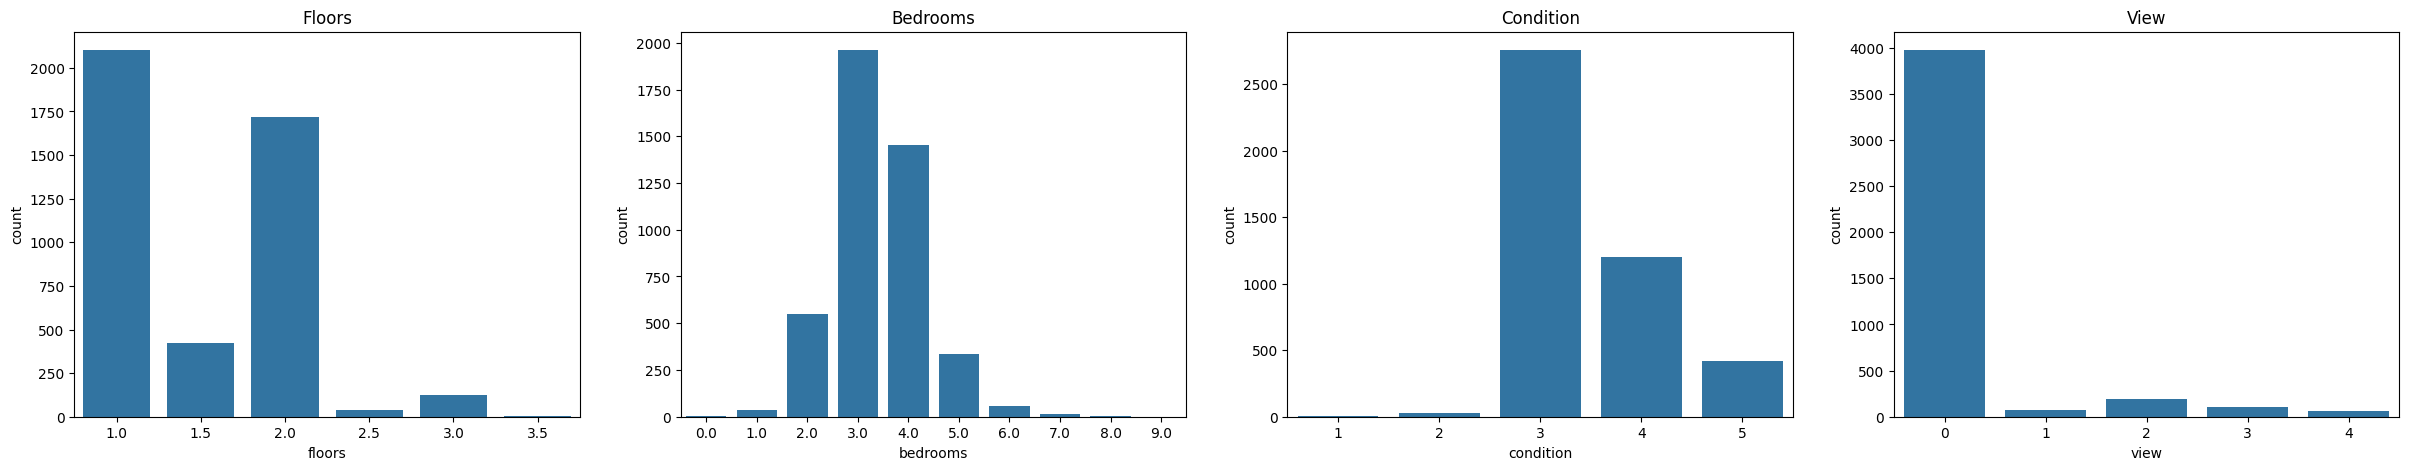

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,5))

# First count plot
sns.countplot(x='floors', data=df, ax=axes[0])  # Replace 'column1'
axes[0].set_title('Floors')

# Second count plot
sns.countplot(x='bedrooms', data=df, ax=axes[1])  # Replace 'column2'
axes[1].set_title('Bedrooms')

# Third count plot 
sns.countplot(x='condition', data=df, ax=axes[2])
axes[2].set_title('Condition')

#Fourth count plot 
sns.countplot(x='view', data=df, ax=axes[3])
axes[3].set_title('View')

# Display the plot
plt.show()

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


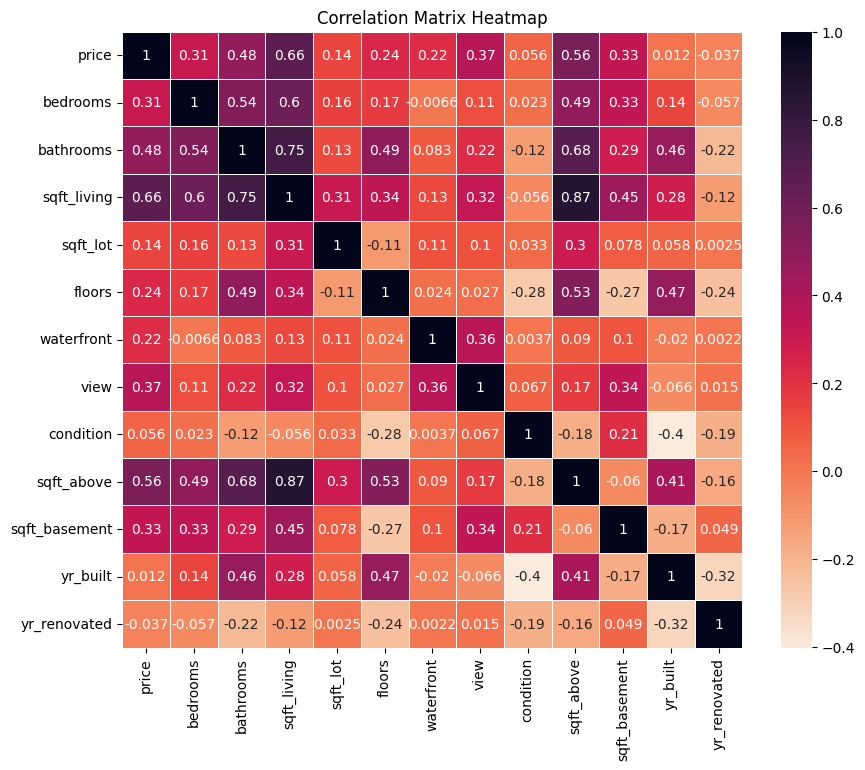

In [25]:
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and 'price' is the column of interest
# Filter the DataFrame for prices under 5,500,000
prices_under_5M = df[df['price'] < 5500000]['price']

# Create the histogram with the filtered data
fig = go.Figure(data=[go.Histogram(x=prices_under_5M)])

# Customize the layout
fig.update_layout(
    title='Histogram of Housing Prices Under 5.5M',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2
    # Uncomment below to specify bin size
    # xaxis=dict(
    #     tickmode='linear',
    #     dtick=50000
    # )
)

# Display the histogram
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [33]:
fig = px.scatter(df, x='bedrooms', y='price', title='Price vs. Bedrooms',
                 labels={'bedrooms': 'Number of Bedrooms', 'price': 'Price'})

fig.update_layout(
    xaxis=dict(title='Number of Bedrooms'),
    yaxis=dict(title='Price'),
    margin=dict(l=40, r=40, b=40, t=40)
)

# Display the scatterplot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed